# Apache Spark

### An Introduction

The amount of data being stored and processed is increasing at an unimaginable rate. Data is stored in the form of structured data (defined rows and columns) as well as semi-structured and unstructured data. Everything from posts on social media platforms to comments on e-commerce sites are being stored somewhere so that they can be used to better understand users and analyzed in order to drive business decisions. In 2006, Hadoop, a framework that enables distributed storage and processing of BigData came into existense. Hadoop used a framework known as MapReduce to process data stored on its ditributed file system. This process was able to process enormous amounts of data at a relatively higher speed than any other available frameworks at the time. However, since then, the amount of data being processed and the demand for quicker processing has risen. Spark was built to satisfy this growing need of fast processing of large amounts of data.

### A Brief History of Apache Spark

In 2009, UC Berkeley's Matei Zaharia started the development of Spark and open-sourced it in 2010. In 2013, Spark was donated to Apache Software Foundation. Apache Spark became a top-level apache project in February of 2014. Today, Apache Spark is one of the most widely used bigdata processing softwares in the world.

### Why Spark?

Apache Spark has 5 key features that make it desirable:

1) Speed: Apache Spark provides much faster processing speeds than running on Hadoop's MapReduce. Spark is able to run its transformations in-memory which makes it up to a hundred times faster. It also takes far less time when running on disk. Spark achieves this by running intermediate reads and writes in memory and as a result, reduces the number of reads and writes into the disk. 

2) Multiple languages: Spark can be accessed and modified using built in libraries in multiple programming languages including Python, Java, Scala and R. Therefore, if running multiple applications on Spark, each one can be written in a different language. 

3) Analytics: Spark has many features which facilitate analytics such as an extensive Machine Learning library known as MLLib, streaming services and SQL capabilites.

4) Distributed processing: Another feature that facilitates the fast processing speeds is the fact that Spark can distribute its processing tasks across multiple computers in a distributed system.

5) Multiple Storage Systems: Another advantage of Spark is that it can be applied on data from many existing relational database platforms such as MySQL, PostgreSQL as well as NoSQL databases such as MongoDb and Cassandra. It can also import data from text files, web logs and cloud storage systems such as Amazon S3.

### Components of Apache Spark

1) Apache Spark Core: The Spark Core is the component that allows Spark to conduct its operations in-memory. It is also key to Sparks ability to access external storage systems.

2) Spark RDD: Spark's Resilient Distributed Dataset (RDD) is a programming abstraction which ca hold a collection of objects which can be split amongst several nodes of a cluster. Processing operations on RDDs can also be distributed accross clusters of computers and parallelly processed.

3) Spark SQL: SparkSQL introduces a component known as SchemaRDD, which is comprised of row-objects along with schemas which define the data types of the columns. SchemaRDD can be built from an RDD, about which we will discuss in the coming sections. SchemaRDD facilitates operations on structured and semi-structured data. 

4) Spark Streaming: Spark Streaming is an important component of Spark that allows for additive analytics. Using the Spark Core's scheduling capabilities, it is able to ingest sub-batches of data and perform RDD transformations on those batches. 

5) Spark MLlib: MLlib is Spark's very own Machine Learning framework, which runs much faster than Hadoop's Apache Mahout, which used to run operations on the disk before the Spark interface was integrated with it. 

6) GraphX: GraphX is a component in spark which processes graphs and graph-parallel computation. GraphX extends the Spark RDD by introducing a new Graph abstraction: a directed multigraph with properties attached to each vertex and edge.

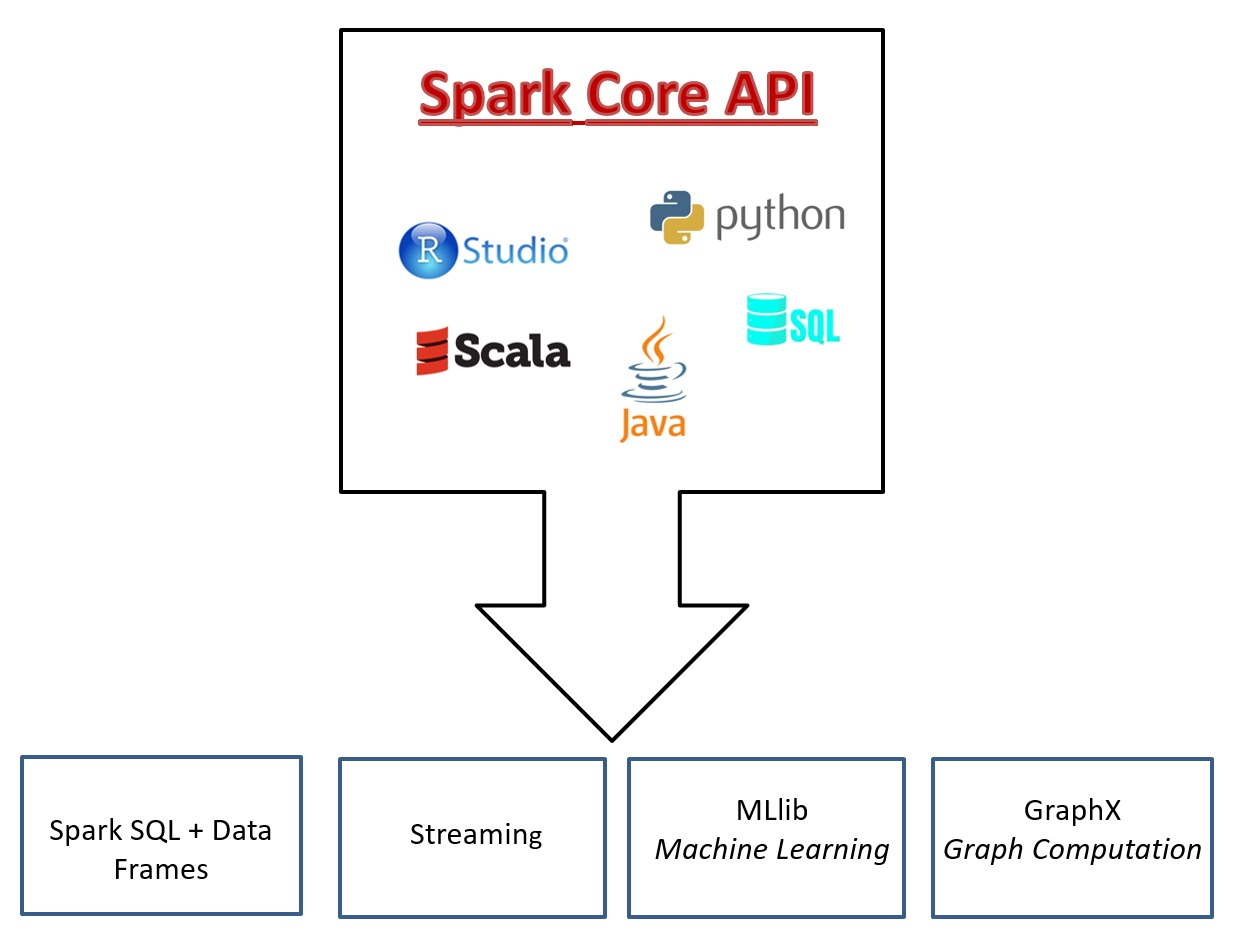

In [2]:
from IPython.display import Image
import os
os.chdir("C:/Users/Arjun/Documents/NEU/DMDD/Project")
Image(filename = 'components.jpeg')

### What is a Resilient Distributed Dataset?

Most of the transformational and actionable operations on data happens through an Apache Spark data structure known as Resilient Distributed Dataset. RDD are logical collections of data objects partitioned across machines. An RDD can be a collection of datasets which can be diveded into logical partitions, which can be computed on different nodes of the cluster. An RDD can be created through transformations of imported or stored data, or can be created through other RDDs. However, once an RDD is created, it cannot be modified. Only way to build on an existing RDD is to perform transformations on it and creating a new RDD.

#### Iterative Operations using Spark RDD

Operations on RDD is an iterative process. Any intermediate process is stored in a distributed memory instead of storing it in the disk making the process of retrieving the intermediate component for the next iteration a much quicker process. This is one of the key features of RDD that makes it perform much faster than the traditional MapReduce framework. This is supported by another feature of RDD which makes the data hightly sharable. Spark stores the state of memory across jobs and the object is sharable between those jobs. Below is a diagram detailing the iterative process of RDD operations.

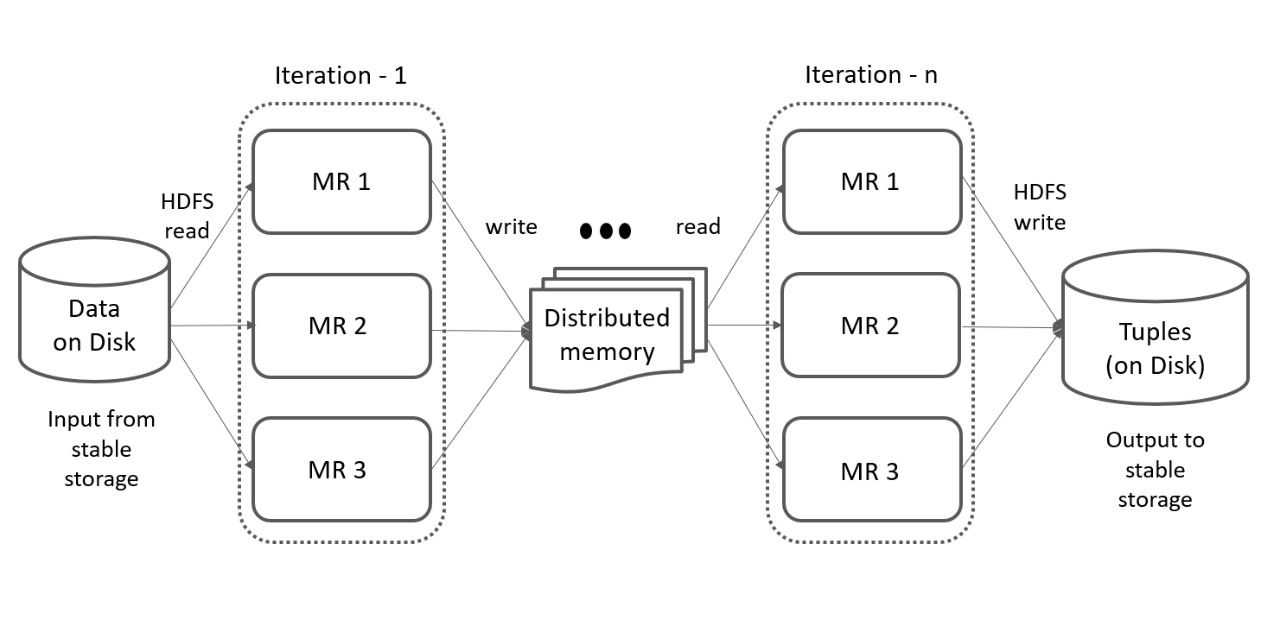

In [3]:
Image("iterative.jpeg")

### Using DataBricks

For the purpose of this tutorial, we will be using DataBricks which is a an analytics and data processing platform which enables use of Spark in a very user friedly and hassle free manner. 

Now that we have installed DataBricks, there is nothing left to do but get some hands on practice!

#### Uploading a file

#### Step 1
Go to the Data option on the side panel and select 'Add Data'.

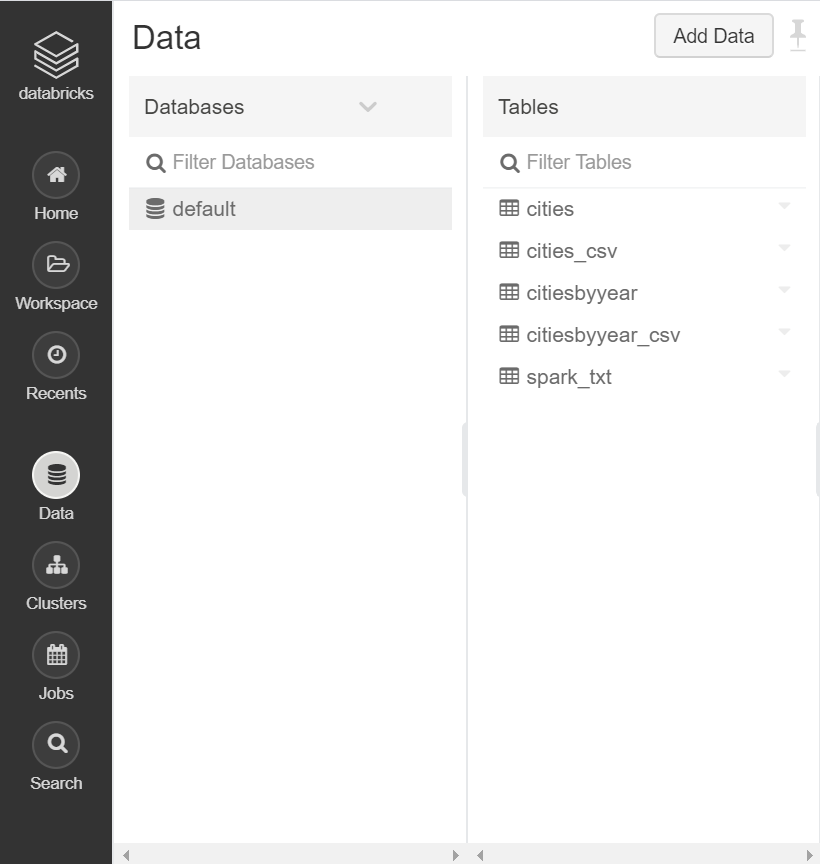

In [8]:
Image("import file 1.png", width = 500, height = 500)

#### Step 2 
Upload a from local file system

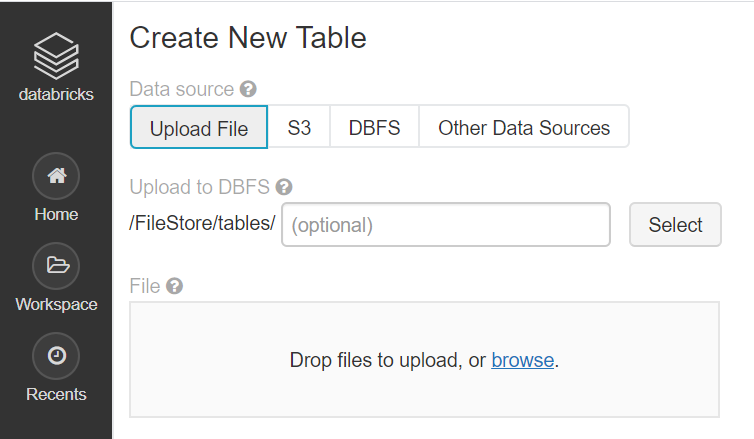

In [10]:
Image("import file 2.png", width = 500, height = 500)

#### Step 3
Once upload is complete (green check mark appears) click on 'Create Table With UI' .

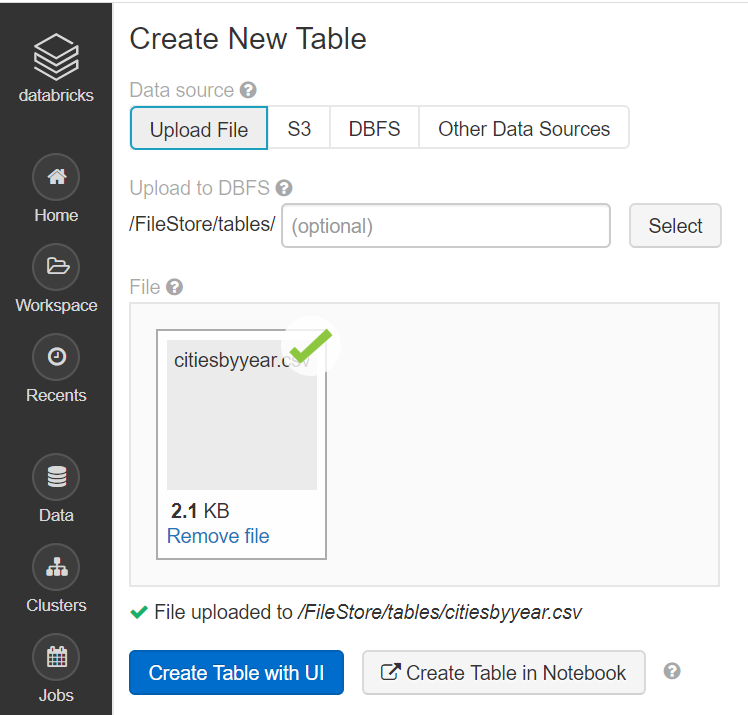

In [12]:
Image("import file 3.png", width = 500, height = 500)

#### Step 4
Check the 'First Row is Header' option then change the data types as per requirement. Then click on 'Create Table'.

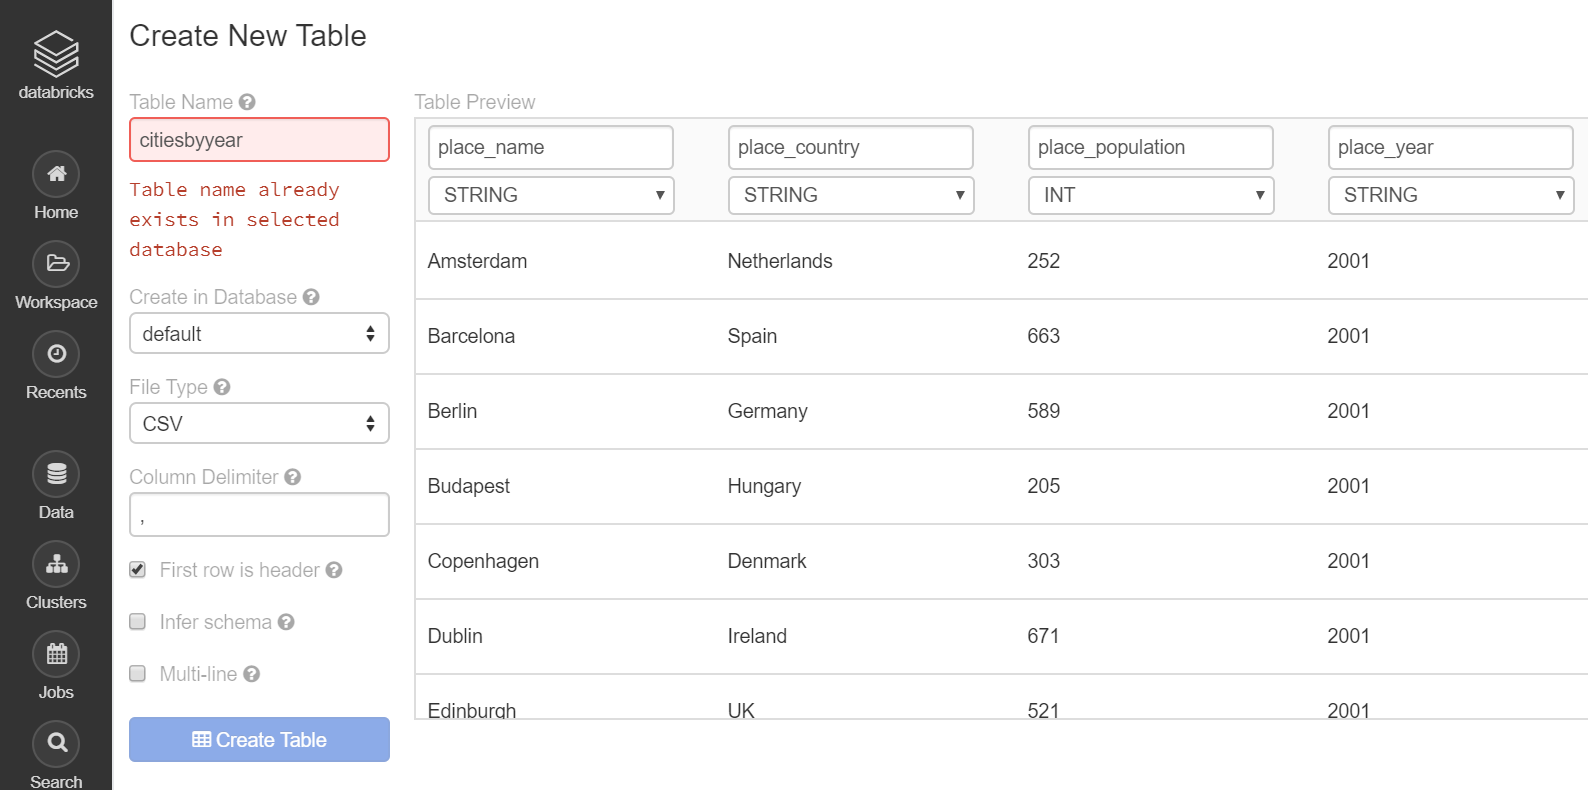

In [14]:
Image("import file 4.png", width = 500, height = 500)

Once you completed the above steps in importing the required files, use the below command to identify where your files resides in the DataBricks File System (DBFS). '%fs' allows you to naviagate through the DBFS using commands similar to those used while navigating through command line directories. In the below case 'ls' lists all the files in the given path dbfs:/FileStore/tables.

In [19]:
%fs ls dbfs:/FileStore/tables

path,name,size
dbfs:/FileStore/tables/cities.csv,cities.csv,815
dbfs:/FileStore/tables/spark.txt,spark.txt,252


Since 'cities.csv' is the file we need, we can use the below command to import it into a Spark Dataframe object. 'path' is defined to hold the path of the file in question and the function textfile() is used to call the file and store it into the cities object. 'sc' here indicates the activation of the SparkContext which converts the imported data into a Spark Dataframe.

In [21]:
path = "dbfs:/FileStore/tables/cities.csv"
cities = sc.textFile(path)

#### Actions

Now that we have our object, we can begin applying action and transformation operations on it. Below, the count() action operator extracts the count of the number of records in the cities object. As seen below we have 20 records. An Action is performed when we want to work with the actual dataset. When an action is triggered a new RDD is not formed like the case of transformations. The values of Action are stored to drivers or to the external storage system.

In [24]:
cities.count()

Out[50]: 20

Another Action is the first() operator. This operator retieves the first element in the object.

In [26]:
cities.first()

Out[51]: 'place_name,place_country,place_airport'

Take() is another Action operator that allows you to define how many elements of the object you want to extract. In the below example, 20 rows are selected using the take() operator. Note that the output came as a List wit each line as a separate element in the list.

In [28]:
cities.take(20)

Out[52]: ['place_name,place_country,place_airport',
 'Amsterdam,Netherlands,Amsterdam Schiphol (AMS) Airport',
 'Barcelona,Spain,Josep Tarradellas Barcelona-El Prat Airport',
 'Berlin,Germany,Berlin Tegel',
 'Budapest,Hungary,Budapest (BUD) Airport',
 'Copenhagen,Denmark,Bornholm Airport',
 'Dublin,Ireland,Oakland International Airport',
 'Edinburgh,UK,Edinburgh Airport',
 'Helsinki,Finland,Helsinki-Vantaa Airport',
 'Lisbon,Portugal,Lisbon (LIS) Airport',
 'Ljubljana,Slovenia,Ljubljana (LJU) Airport',
 'London,UK,London Heathrow',
 'Oslo,Norway,Oslo Airport Gardermoen',
 'Paris,France,Charles De Gaulle airport\xa0(CDG)',
 'Prague,Czechia,Prague (PRG) Airport',
 'Metropolitan City of Rome,Italy,Ciampino',
 'Stockholm,Sweden,Stockholm Arlanda Airport',
 'Vienna,Austria,Vienna (VIE) Airport',
 'Warsaw,Poland,Warsaw Chopin Airport',
 'Zurich,Switzerland,Zurich (ZRH) Airport']

#### Transformations

Let us now move on to RDD transformations. Spark Transformation is a function that produces new RDD from existing RDDs. It takes an RDD as its input and produces RDDs as its output. Transformations build an RDD lineage, which start from the parent RDD and after many tranformation iterations derve the final RDD. Transformations are considered lazy in nature. By this, we mean that transformations only take effect when an action is called.

##### filter(func) operator

The filter() operator returns a new RDD by selecting the elements that satisfy the func function. In the below example, the function searches for the string "Airport" across all the elements of the cities dataframe. Here the key word lambda defines the function being used and is a keyword in Python. Notice that this transformation is being activated by the count() action.

In [33]:
numairport = cities.filter(lambda s: "Airport").count()
print("Lines with 'Airport' in it: %i" %(numairport))

Lines with 'Airport' in it: 20

##### map(func) operator

The map() operator returns a new RDD which is formed by passing each element of the source through the func function. The map operator can be used to split, and even change the structure of tuples in the source. In the below example the map() operator is being used to split each line in the cities dataframe using a ',' delimiter. This is being stored into rows. As you can see the below code has not been activated while being stored into 'rows'. In order to print each transformed line in rows we have to put it through a for loop which iterates through the total number of rows. 
The map() operator has been activated in the initiation of the for loop.

In [36]:
rows = cities.map(lambda line: line.split(','))

In [37]:
for row in rows.take(rows.count()): print(row)

['place_name', 'place_country', 'place_airport']
['Amsterdam', 'Netherlands', 'Amsterdam Schiphol (AMS) Airport']
['Barcelona', 'Spain', 'Josep Tarradellas Barcelona-El Prat Airport']
['Berlin', 'Germany', 'Berlin Tegel']
['Budapest', 'Hungary', 'Budapest (BUD) Airport']
['Copenhagen', 'Denmark', 'Bornholm Airport']
['Dublin', 'Ireland', 'Oakland International Airport']
['Edinburgh', 'UK', 'Edinburgh Airport']
['Helsinki', 'Finland', 'Helsinki-Vantaa Airport']
['Lisbon', 'Portugal', 'Lisbon (LIS) Airport']
['Ljubljana', 'Slovenia', 'Ljubljana (LJU) Airport']
['London', 'UK', 'London Heathrow']
['Oslo', 'Norway', 'Oslo Airport Gardermoen']
['Paris', 'France', 'Charles De Gaulle airport\xa0(CDG)']
['Prague', 'Czechia', 'Prague (PRG) Airport']
['Metropolitan City of Rome', 'Italy', 'Ciampino']
['Stockholm', 'Sweden', 'Stockholm Arlanda Airport']
['Vienna', 'Austria', 'Vienna (VIE) Airport']
['Warsaw', 'Poland', 'Warsaw Chopin Airport']
['Zurich', 'Switzerland', 'Zurich (ZRH) Airport']

The output above clearly shows that each line has now been split into a list of 3 items. This is the affect of the map() operator.

##### fltamap(func)

The flatmap() operator is similar to map() but each input item can be mapped to 0 or more output items. Ths function returns a sequence rather than a single item. For the purpose of this example, we are creating a list called 'names' which contains 6 different names.

In [41]:
names = ['Smith', 'Mark', 'Alice','Lucy','Sheldon','Mary']

As can be seen below, the function that the source list passes through specifies a replication of the items by a factor of 3. The parallelize() function enables parallel operation on the object it is applied on. Here the collect() action activates the flatmap(). Collect() prints the collection of items produced by the transformation.

In [43]:
sc.parallelize(names).flatMap(lambda x: [x,x,x]).collect()

Out[72]: ['Smith',
 'Smith',
 'Smith',
 'Mark',
 'Mark',
 'Mark',
 'Alice',
 'Alice',
 'Alice',
 'Lucy',
 'Lucy',
 'Lucy',
 'Sheldon',
 'Sheldon',
 'Sheldon',
 'Mary',
 'Mary',
 'Mary']

The same function when passed through map() instead of flatmap() creates a list with each item being a list. However, in flatmap() a single all the items were 'flattened' into a single list.

In [45]:
sc.parallelize(names).map(lambda x: [x,x,x]).collect()

Out[73]: [['Smith', 'Smith', 'Smith'],
 ['Mark', 'Mark', 'Mark'],
 ['Alice', 'Alice', 'Alice'],
 ['Lucy', 'Lucy', 'Lucy'],
 ['Sheldon', 'Sheldon', 'Sheldon'],
 ['Mary', 'Mary', 'Mary']]

##### sample(With Replacement(True/False), fraction, seed)

The sample() operator samples given data with or without replacement by the fraction amount specified in the function. The below example samples 0.3 times 'sample_ex' which contains a range of numbers from 1 to 100 without replacement.

In [48]:
sample_ex = sc.parallelize(range(1,100))
sample_ex.sample(False, 0.3).collect()

Out[82]: [4,
 6,
 8,
 12,
 15,
 17,
 20,
 26,
 27,
 28,
 30,
 35,
 36,
 37,
 44,
 49,
 51,
 58,
 59,
 61,
 63,
 64,
 70,
 75,
 78,
 80,
 82,
 88,
 89,
 91,
 93,
 94,
 95]

In [49]:
sample_ex.sample(False, 0.3).count()

Out[142]: 24

##### union(otherDataset)

The Union() operator returns a new RDD that contain the union of the source and the argument of the operator. The below example shows us how to implement union(). The 'first' object and 'second' argument are unionized. 

In [50]:
first = sc.parallelize(range(1,10))
second = sc.parallelize(range(10,20))
first.union(second).collect()

Out[143]: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

Recapping on the previously discussed map(), a function of double duplication has been applied to the result of the union(). This demonstrates the iterative features of RDD transformations. 

In [51]:
first.union(second).map(lambda x: [x,x]).collect()

Out[85]: [[1, 1],
 [2, 2],
 [3, 3],
 [4, 4],
 [5, 5],
 [6, 6],
 [7, 7],
 [8, 8],
 [9, 9],
 [10, 10],
 [11, 11],
 [12, 12],
 [13, 13],
 [14, 14],
 [15, 15],
 [16, 16],
 [17, 17],
 [18, 18],
 [19, 19]]

##### intersection(otherDataset)

The intersection() is used in a similar way to union(). The difference here is that only common elements are returned.

In [52]:
third = sc.parallelize(range(5,25))
union = first.union(second)
union.intersection(third).collect()

Out[92]: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

##### distinct()

The distinct() returns a new RDD that only contains the distinct elements within the source. In the below code, an iterative transformation has been executed. distinct value of the union of 2 sources has been extracted.

In [53]:
par1 = sc.parallelize([1,2,3,4,5,6,7,7,3,4,2,1,5])
par2 = sc.parallelize([9,8,7,6,5,4,3,2,1])
par1.union(par2).distinct().collect()

Out[94]: [1, 2, 3, 4, 5, 6, 7, 8, 9]

##### groupByKey()

The groupByKey() returns an RDD with a Key and Value set. In the below example, the map() structures the data to be fed into the groupByKey(). It only considers the 0th and the 1st term in each tuple in rows which is then grouped by the value of the key. 

In [54]:
rows = cities.map(lambda x: x.split(','))
city_group = rows.map(lambda n: (str(n[0]),str(n[1]))).groupByKey()

In [55]:
city_group.map(lambda city: {city[0]: list(city[1])}).collect()

Out[102]: [{'Barcelona': ['Spain']},
 {'Budapest': ['Hungary']},
 {'Dublin': ['Ireland']},
 {'Edinburgh': ['UK']},
 {'Helsinki': ['Finland']},
 {'Lisbon': ['Portugal']},
 {'Ljubljana': ['Slovenia']},
 {'Metropolitan City of Rome': ['Italy']},
 {'Vienna': ['Austria']},
 {'Warsaw': ['Poland']},
 {'Zurich': ['Switzerland']},
 {'place_name': ['place_country']},
 {'Amsterdam': ['Netherlands']},
 {'Berlin': ['Germany']},
 {'Copenhagen': ['Denmark']},
 {'London': ['UK']},
 {'Oslo': ['Norway']},
 {'Paris': ['France']},
 {'Prague': ['Czechia']},
 {'Stockholm': ['Sweden']}]

For the purpose of further operations, we are inserting a new dataset called citiesbyyear.csv. The data in the datasets used in this exercise are in no way true. 

In [56]:
cityPop = sc.textFile("dbfs:/FileStore/tables/citiesbyyear.csv")
cityPop.collect()

Out[126]: ['place_name,place_country,place_population,place_year',
 'Amsterdam,Netherlands,252,2001',
 'Barcelona,Spain,663,2001',
 'Berlin,Germany,589,2001',
 'Budapest,Hungary,205,2001',
 'Copenhagen,Denmark,303,2001',
 'Dublin,Ireland,671,2001',
 'Edinburgh,UK,521,2001',
 'Helsinki,Finland,347,2001',
 'Lisbon,Portugal,529,2001',
 'Ljubljana,Slovenia,570,2001',
 'London,UK,853,2001',
 'Oslo,Norway,716,2001',
 'Paris,France,733,2001',
 'Prague,Czechia,978,2001',
 'Metropolitan City of Rome,Italy,630,2001',
 'Stockholm,Sweden,567,2001',
 'Vienna,Austria,603,2001',
 'Warsaw,Poland,255,2001',
 'Zurich,Switzerland,244,2001',
 'Amsterdam,Netherlands,429,2002',
 'Barcelona,Spain,604,2002',
 'Berlin,Germany,418,2002',
 'Budapest,Hungary,927,2002',
 'Copenhagen,Denmark,397,2002',
 'Dublin,Ireland,922,2002',
 'Edinburgh,UK,672,2002',
 'Helsinki,Finland,258,2002',
 'Lisbon,Portugal,920,2002',
 'Ljubljana,Slovenia,498,2002',
 'London,UK,894,2002',
 'Oslo,Norway,504,2002',
 'Paris,France,729,2002',
 'Prague,Czechia,345,2002',
 'Metropolitan City of Rome,Italy,709,2002',
 'Stockholm,Sweden,731,2002',
 'Vienna,Austria,632,2002',
 'Warsaw,Poland,361,2002',
 'Zurich,Switzerland,391,2002',
 'Amsterdam,Netherlands,882,2003',
 'Barcelona,Spain,460,2003',
 'Berlin,Germany,423,2003',
 'Budapest,Hungary,669,2003',
 'Copenhagen,Denmark,990,2003',
 'Dublin,Ireland,896,2003',
 'Edinburgh,UK,545,2003',
 'Helsinki,Finland,212,2003',
 'Lisbon,Portugal,262,2003',
 'Ljubljana,Slovenia,466,2003',
 'London,UK,358,2003',
 'Oslo,Norway,947,2003',
 'Paris,France,248,2003',
 'Prague,Czechia,279,2003',
 'Metropolitan City of Rome,Italy,570,2003',
 'Stockholm,Sweden,469,2003',
 'Vienna,Austria,314,2003',
 'Warsaw,Poland,646,2003',
 'Zurich,Switzerland,844,2003',
 'Amsterdam,Netherlands,977,2004',
 'Barcelona,Spain,791,2004',
 'Berlin,Germany,354,2004',
 'Budapest,Hungary,846,2004',
 'Copenhagen,Denmark,559,2004',
 'Dublin,Ireland,744,2004',
 'Edinburgh,UK,490,2004',
 'Helsinki,Finland,722,2004',
 'Lisbon,Portugal,201,2004',
 'Ljubljana,Slovenia,317,2004',
 'London,UK,969,2004',
 'Oslo,Norway,970,2004',
 'Paris,France,949,2004',
 'Prague,Czechia,741,2004',
 'Metropolitan City of Rome,Italy,236,2004',
 'Stockholm,Sweden,563,2004',
 'Vienna,Austria,312,2004',
 'Warsaw,Poland,812,2004',
 'Zurich,Switzerland,644,2004']

##### reduceByKey(func)

The reduceByKey() calls on a dataset of key value pairs which can be structured using the map(). The reduceByKey() returns a Key-Value pair with the value having been reduced using the func defined. In the below example, reduceByKey() is passed a function that asks for all values having the same key to be summed. In this example, the place_name field is taken as the key and the population being the third field in the dataset is taken as the value associated with the key. 

In [57]:
cityrows = cityPop.filter(lambda line: "population" not in line).map(lambda line: line.split(','))
cityrows.map(lambda n: (str(n[0]), int(n[2]))).reduceByKey(lambda v1,v2: v1+v2).collect()

Out[105]: [('Barcelona', 2518),
 ('Budapest', 2647),
 ('Dublin', 3233),
 ('Edinburgh', 2228),
 ('Helsinki', 1539),
 ('Lisbon', 1912),
 ('Ljubljana', 1851),
 ('Metropolitan City of Rome', 2145),
 ('Vienna', 1861),
 ('Warsaw', 2074),
 ('Zurich', 2123),
 ('Amsterdam', 2540),
 ('Berlin', 1784),
 ('Copenhagen', 2249),
 ('London', 3074),
 ('Oslo', 3137),
 ('Paris', 2659),
 ('Prague', 2343),
 ('Stockholm', 2330)]

As can be seen, the populations for each city over 4 years has been added up. 

##### aggregateByKey(func)

The aggregateByKey() works similarly to reduceByKey(), where it receives a key-value pair and aggregates the values to return a new set of key value pairs. In the below example, we are aggregating the sums of populations by the year.

In [58]:
cityrows.map(lambda n: (str(n[3]), int(n[2]))).aggregateByKey(0, lambda k,v:int(v)+k, lambda v,: k+v).collect()

Out[124]: [('2002', 11341), ('2003', 10480), ('2004', 12197), ('2001', 10229)]

##### sortByKey()

When the sortByKey() is called on a set of Key-value pairs, it returns the set in ascending or descending order as specified in the function. 

In [59]:
popCount = cityrows.map(lambda n: (str(n[0]),int(n[2]))).reduceByKey(lambda v1,v2: v1+v2)
popCount.map(lambda n: (int(n[1]), str(n[0]))).sortByKey().map(lambda n:(str(n[1]),int(n[0]))).collect()

Out[135]: [('Helsinki', 1539),
 ('Berlin', 1784),
 ('Ljubljana', 1851),
 ('Vienna', 1861),
 ('Lisbon', 1912),
 ('Warsaw', 2074),
 ('Zurich', 2123),
 ('Metropolitan City of Rome', 2145),
 ('Edinburgh', 2228),
 ('Copenhagen', 2249),
 ('Stockholm', 2330),
 ('Prague', 2343),
 ('Barcelona', 2518),
 ('Amsterdam', 2540),
 ('Budapest', 2647),
 ('Paris', 2659),
 ('London', 3074),
 ('Oslo', 3137),
 ('Dublin', 3233)]

In [60]:
popCount1 = cityrows.map(lambda n: (str(n[0]),int(n[2]))).reduceByKey(lambda v1,v2: v1+v2).map(lambda n: (int(n[1]), str(n[0]))).sortByKey().map(lambda n:(str(n[1]),int(n[0])))
popCount1.collect()

Out[138]: [('Helsinki', 1539),
 ('Berlin', 1784),
 ('Ljubljana', 1851),
 ('Vienna', 1861),
 ('Lisbon', 1912),
 ('Warsaw', 2074),
 ('Zurich', 2123),
 ('Metropolitan City of Rome', 2145),
 ('Edinburgh', 2228),
 ('Copenhagen', 2249),
 ('Stockholm', 2330),
 ('Prague', 2343),
 ('Barcelona', 2518),
 ('Amsterdam', 2540),
 ('Budapest', 2647),
 ('Paris', 2659),
 ('London', 3074),
 ('Oslo', 3137),
 ('Dublin', 3233)]

The above code gives another strong demonstration on how transformations on RDDs can be iterative and can be done in a single statement. In the above code we are trying to achieve the same result as the sortByKey() example, however, in a single statement.  

### What more can Spark offer?

#### Spark Streaming

Spark streaming is the component that enables the processing of new data as it comes in. Spark streaming runs micro-batches which operate like any normal batch operation, more frequently on smaller datasets. this provides a streaming result to the user. This works using a Lambda architecture. Lambda architecture is a traditional way of streaming data. In this method, historical data is taken and to which new data is aggregated in realtime.

#### Spark MLlib

MLlib is Apache Sparks very own Machine Learning library. MLlib supports a large number of ML algorithms and at the same time is highly scalable. It is also a desirable framework to use since it can work very well with spark streaming hence enabling iterative analytical capabilities. Apart from supporting a number of ML algorithms, MLlib has many features which facilitate feature engineering and pipeline construction. 

# Contribution
Your contribution towards project. How much code did you write and how much you took from other site or some other source

Contributed By group: 40%

By External source: 60%

# Citations
Sources from where you have gained knowledge or used codes, data. It may include Web links, github links, code taken from somewhere etc.

https://www.tutorialspoint.com/apache_spark/index.htm
https://docs.databricks.com/
https://spark.apache.org/docs/latest/rdd-programming-guide.html#resilient-distributed-datasets-rdds
https://docs.databricks.com/data/databricks-file-system.html
https://supergloo.com/spark-python/apache-spark-transformations-python-examples/

# Github Links

Sumedha Hunagund: https://github.com/Sumedha1496/6210_08_BantabaProject
Arjun Acharya: https://github.com/ArjunAcharya0311/INFO6210_FinalProject_Bantaba
Nikhil Nijhawan: https://github.com/nikhil-nijhawan/Project_Portfolio

# License
Copyright 2019 Sumedha Hunagund, Nikhil Nijhawan, Arjun Acharya

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.